* Final Project Submission
* Student Name: Benson Kamau
* Student Pace: Full-Time
* Instructor's: Nikita Njoroge

## Title: Predicting the functionality of Water wells in Tanzania

#### Overview

Tanzania, a country of nearly 57 million people, has a serious problem ensuring that its people have access to dependable and safe water sources. Although there are many water stations around the nation that have been created by the government and non-governmental organizations (NGOs), a significant number of these facilities are either non-operational or in critical need of repair. The objective of guaranteeing all Tanzanians long-term access to this essential resource is put in jeopardy by this circumstance. Ensuring the upkeep and efficiency of the current water infrastructure is of utmost importance in order to protect the welfare and advancement of people throughout this country in East Africa.

#### Challenges 

1. Environmental factors: Droughts and seasonal variations can have a big impact on well water supply. Extended dry spells can lower water levels, which can lead to wells being unreliable.
2. Contamination: A number of things, such as being next to a latrine, agricultural runoff, and naturally occurring contaminants in the groundwater, can pollute water wells. Communities that depend on these wells run the danger of health problems due to contaminated water.
3. Maintenance and repair: This can be attributed to factors including lack of funding for regular upkeep and lack of technical skills to maintain and repair the wells.
4. Public Awareness: The necessity of keeping water wells maintained and the potential health risks of drinking contaminated water are sometimes not well understood.

#### Proposed solution

1. Invest in boreholes and deeper wells that are more resilient to drought and seasonal fluctuations. Complementing these wells with other water sources would also help the community during dry season. 
2. Establish community-based water monitoring systems with the assistance of environmental and health organizations to guarantee routine supervision and timely reaction to pollution.
3. Encourage partnerships between the government, private sector, and NGOs to pool resources and share the responsibility of maintaining water wells.
4. Educate the community on the importance of maintaining the wells and risks associated with contaminated water.

#### Conclusion

The analysis identified key factors influencing well functionality, including geographic location, construction details, environmental conditions, and maintenance practices.

#### Problem Statement

Access to safe and consistent drinking water is a major challenge in Tanzania, especially in rural regions with minimal infrastructure. To solve this issue, the Tanzanian government has made investments in the building of water wells in collaboration with a number of non-governmental organizations. However, the sustainability and functionality of these wells remain uncertain, with many of them falling into disrepair or becoming non-functional over time.

#### Objectives

Main objective 
 1. To develop a machine learning classifier(using  decision trees, random forest and XGBoost)that predicts the condition of water wells in Tanzania.

Specific objectives
1. Prepare and analyse data for modeling
2. Develop predictive Model
3. Provide actionable insights and recommendations based on the findings of the model

### Importing relevant libraries 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Data Loading and Understanding

The data is sourced from Taarifa and the Tanzanian Ministry of Water. Data utilized can be found here: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/

For the purposes of our evaluation, we are utilizing the Training Set Labels and Training Set Values, which include data from 59,400 pumps. 
We will then use the Test set values to test our models.

The following is a list of column names and descriptions:

* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private -
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

In [74]:
#create a function that loads data and gets the info about the data.
def load_and_get_info(file_path):
    """
    Load data from a CSV file and get information about the DataFrame.

    Parameters:
    - file_path (str): Path to the CSV file.

    Returns:
    - df_info (str): Information about the DataFrame.
    """
    # Load data
    df = pd.read_csv(file_path)

    # Display the first few rows of the DataFrame
    df_head = df.head()

    # Get information about the DataFrame
    df_info = df.info()

    return df,df_info, df_head

# A function that checks the data types of DataFrame columns and return the count of columns for each data type category.
def check_data_types(df):
    """
    Check the data types of DataFrame columns and return the count of columns for each data type category.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - data_type_counts (dict): Dictionary containing the count of columns for each data type category.
    """
    data_type_counts = df.dtypes.replace({'object': 'string'}).value_counts().to_dict()
    return data_type_counts

#### 1.1 Loading our first dataset - Training set values

This data contains the independent variables that i will use to build a model.

In [75]:
file_path1 = 'data/training set values.csv'
df1,data_info, data_head = load_and_get_info(file_path1)
print(data_info)
print("\nFirst few rows of the DataFrame:")
data_head #data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Our training set values contains 59400 rows and 40 columns. 

In [76]:
#check the data types of DataFrame columns in our training set values.
data_type_counts = check_data_types(df1)
print("Count of columns for each data type category:")
print(data_type_counts)

Count of columns for each data type category:
{'string': 30, dtype('int64'): 7, dtype('float64'): 3}


The dataset is divided into three data types categories:
1. String(object type) which has 30 columns e.g., funder, installer. 
2. Integer type which has 7 columns e.g., gpd_height, region_code, district_code
3. Float type which has 3 columns e.g., longitude and latitude

#### 1.2 Loading our second dataset - Training set labels

This data contains the dependent variable that i will use to build a model.

In [77]:
file_path2 = 'data/training set labels.csv'
df2,data_info, data_head = load_and_get_info(file_path2)
print(data_info)
print("\nFirst few rows of the DataFrame:")
data_head #data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB
None

First few rows of the DataFrame:


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


The dataset has 2 columns(id and status_group) and 59,400 rows.

In [78]:
#check the data types of DataFrame columns in our training set values.
data_type_counts = check_data_types(df2)
print("Count of columns for each data type category:")
print(data_type_counts)


Count of columns for each data type category:
{dtype('int64'): 1, 'string': 1}


#### 1.3 Loading the third dataset - Test set values

This data contains data that i will use to test my model later. This is my unseen data.

In [79]:
file_path3 = 'data/Test set values.csv'
test_data,data_info, data_head = load_and_get_info(file_path3)
print(data_info)
print("\nFirst few rows of the DataFrame:")
data_head #data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,04/02/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,04/02/2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,01/02/2013,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,22/01/2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,27/03/2013,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


The dataset has 14,850 rows and 40 columns.

In [80]:
#check the data types of DataFrame columns in our training set values.
data_type_counts = check_data_types(test_data)
print("Count of columns for each data type category:")
print(data_type_counts)

Count of columns for each data type category:
{'string': 30, dtype('int64'): 7, dtype('float64'): 3}


The dataset is divided into three data types categories:
1. String(object type) which has 30 columns  
2. Integer type which has 7 columns 
3. Float type which has 3 columns 

#### 1.4 Merging the training set values and training set labels

In [81]:
# merging the training set values and training set labels on the 'id' column
train_data = pd.merge(df1, df2, on='id')
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [82]:
#Check the distribution of the target variable(status_group)
train_data['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

### Data Cleaning

In this, both my training data and test data will be cleaned in the same way, e.g.,the number of columns dropped in the training data will equal the number of columns dropped in the test data.

To start our data cleaning process, we will check the num_private column because no description has been provided.

In [83]:
train_data['num_private'].value_counts()

num_private
0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: count, Length: 65, dtype: int64

Over 99% of the data = 0. I presume 0 means the data was not available and choose to drop the column entirely.

In [84]:
#drop the column 'num_private'
train_data.drop(columns=['num_private'],inplace=True)

I will assume that whoever recorded data did so truthfully and this should not effect our target. We drop the column.

In [85]:
#drop the column 'recorded_by'
train_data.drop(columns=['recorded_by'], inplace=True)

Next I explore columns with similar column names and descriptions to see if there is any overlap in ifnormation.

In [86]:
#Explore columns with similar column names and descriptions to see if there is any overlap in information.
def explore_similar_columns(df, col1, col2):
    """
    Explore columns with similar names in the DataFrame and return the value counts of the specified columns.

    Parameters:
    - df (DataFrame): The DataFrame containing the columns.
    - col1 (str): The name of the first column.
    - col2 (str): The name of the second column.

    Returns:
    - col1_value_counts (Series): Value counts of the first column.
    - col2_value_counts (Series): Value counts of the second column.
    """
    # Ensure the specified columns exist in the DataFrame
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError(f"One or both of the columns '{col1}' and '{col2}' do not exist in the DataFrame")
    
    # Get value counts for both columns
    col1_value_counts = df[col1].value_counts()
    col2_value_counts = df[col2].value_counts()

    return col1_value_counts, col2_value_counts

1. Payment and Payment_type

In [87]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'payment', 'payment_type')
print(col1_value_counts)

print(col2_value_counts)

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64
payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64


The two columns have similar information in the dataset. I will drop the payment type.

In [88]:
train_data.drop(columns=['payment_type'], inplace=True)

2. Quantity and quantity group

In [89]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'quantity', 'quantity_group')
print(col1_value_counts)

print(col2_value_counts)

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64
quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64


The column 'quantity' and 'quantity_group' have similar names and descriptions, so I can drop one of them.

In [90]:
train_data.drop(columns=['quantity_group'], inplace=True)

3. Waterpoint_type and waterpoint_type group 

In [91]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'waterpoint_type', 'waterpoint_type_group')
print(col1_value_counts)

print(col2_value_counts)

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64
waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64


The above columns have similar names and descriptions, but one of the keys - communal standpipe has different values. I will keep the columns.

4. Source ,source_type and source_type_group

In [92]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'source', 'source_type')
print(col1_value_counts)

print(col2_value_counts)

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64
source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64


In [93]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'source', 'source_class')
print(col1_value_counts)

print(col2_value_counts)

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64
source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64


I drop the source_type and source_class columns since they contain similar information to the source column, which is more robust.

In [94]:
train_data.drop(columns=['source_type', 'source_class'], inplace=True)

5. Extraction_type, extraction_typ_group,extraction_type_name

In [95]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'extraction_type', 'extraction_type_group')
print(col1_value_counts)

print(col2_value_counts)

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64
extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india 

In [96]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'extraction_type', 'extraction_type_class')
print(col1_value_counts)

print(col2_value_counts)

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64
extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64


I will keep the extraction_type and extraction_type_name columns. I will go ahead and drop the extraction_type_group column.

In [97]:
train_data.drop(columns=['extraction_type_group'], inplace=True)

6. Waterpoint_type and waterpoint_type_group

In [98]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'waterpoint_type', 'waterpoint_type_group')
print(col1_value_counts)

print(col2_value_counts)

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64
waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64


I will drop the water_type_group column

In [99]:
#drop the column 'waterpoint_type_group'
train_data.drop(columns=['waterpoint_type_group'], inplace=True)

7. Quality and Water_quality

In [100]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'quality_group', 'water_quality')
print(col1_value_counts)

print(col2_value_counts)

quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64
water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64


I will drop the column 'quality_group' as it has the same values as the column 'water_quality'

In [101]:
#drop the column 'quality_group'
train_data.drop(columns=['quality_group'], inplace=True)

Next, we explore null values and decide how to clean nulls.

In [102]:
def check_nulls_and_duplicates(df):
    # Calculate the number of null values in each column
    null_counts = df.isnull().sum()

    # Calculate the total number of rows
    total_rows = len(df)

    # Calculate the percentage of null values in each column
    null_percentage = (null_counts / total_rows) * 100 
    
    # Display message about columns with null values
    columns_with_null = null_counts[null_counts > 0]
    if not columns_with_null.empty:
        print("Columns with null values and their count/percentage:")
        for column, count in columns_with_null.items():
            percentage = null_percentage[column]
            print(f"{column}: {count} ({percentage:.2f}%)")
    else:
        print("No null values")

    # Calculate the number of duplicate rows
    num_duplicates = df.duplicated().sum()

    # Display the number of duplicate rows
    print(f"Number of duplicate rows: {num_duplicates}")

    return num_duplicates

In [103]:
# Check for null values and duplicates
check_nulls_and_duplicates(train_data)

Columns with null values and their count/percentage:
funder: 3637 (6.12%)
installer: 3655 (6.15%)
wpt_name: 2 (0.00%)
subvillage: 371 (0.62%)
public_meeting: 3334 (5.61%)
scheme_management: 3878 (6.53%)
scheme_name: 28810 (48.50%)
permit: 3056 (5.14%)
Number of duplicate rows: 0


0

From the above output, i will explore the scheme_management and scheme_names further by checking the value counts of each.

In [104]:
col1_value_counts, col2_value_counts = explore_similar_columns(train_data, 'scheme_name', 'scheme_management')
print(col1_value_counts)

print(col2_value_counts)

scheme_name
K                       682
Borehole                546
Chalinze wate           405
M                       400
DANIDA                  379
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: count, Length: 2695, dtype: int64
scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64


I will drop scheme name since scheme management captures similar data more cleanly with fewer nulls. 

In [105]:
train_data.drop(columns=['scheme_name'], inplace=True)

I will go ahead and replace the null values in the coulmns with about 5% or 6% of null values with "unknown"

In [106]:
columns_to_fill = ['funder', 'installer', 'public_meeting', 'scheme_management']

for column in columns_to_fill:
    train_data[column] = train_data[column].fillna(value='Unknown')

I will also drop the null values in the wpt_name and subvillage columns.

In [107]:

train_data.dropna(subset=['wpt_name', 'subvillage'], inplace=True)

Finally, i will check the values in the permit column.

In [108]:
train_data['permit'].value_counts()

permit
True     38791
False    17180
Name: count, dtype: int64

I will replace the null values with True which is also the most common value

In [109]:
train_data['permit'] = train_data['permit'].fillna(value=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16868\1024742864.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['permit'] = train_data['permit'].fillna(value=True)


In [110]:
check_nulls_and_duplicates(train_data)

No null values
Number of duplicate rows: 0


0

Next step is to check the year of construction

In [111]:
train_data['construction_year'].value_counts()

construction_year
0       20347
2010     2644
2008     2613
2009     2533
2000     2091
2007     1586
2006     1471
2003     1286
2011     1254
2004     1123
2012     1083
2002     1075
1978     1037
1995     1013
2005     1009
1999      978
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      707
1974      676
1997      644
1992      640
1993      608
2001      539
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

From the above output I can see that the construction year is 0 for 20347 rows. This is about 35% of our data.
I will find the median of the column without the 20347 rows.

In [112]:
# Create an object to hold column construction_year with year 0
train_data1 = train_data['construction_year'] 
train_data1.describe()

count    59027.000000
mean      1308.498297
std        949.092135
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [113]:
# check the column construction_year without year 0
train_data1 = train_data1[train_data1 != 0]
train_data1.describe()

count    38680.000000
mean      1996.813056
std         12.472071
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

In [114]:
#Change the data type of construction_year to int
train_data['construction_year'] = train_data['construction_year'].astype(int)
# Replace 0 with 2000,
train_data['construction_year'] = train_data['construction_year'].replace(0, 2000)

In [115]:
#check the column construction_year after cleaning the data 
train_data['construction_year'].value_counts()

construction_year
2000    22438
2010     2644
2008     2613
2009     2533
2007     1586
2006     1471
2003     1286
2011     1254
2004     1123
2012     1083
2002     1075
1978     1037
1995     1013
2005     1009
1999      978
1998      966
1990      954
1985      945
1996      811
1980      811
1984      779
1982      744
1994      738
1972      707
1974      676
1997      644
1992      640
1993      608
2001      539
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

I will then go ahead and create a column called age that has the age of the wells followd by dropping the contsruction year.


In [116]:
# create column age
train_data['age'] = 2024 - train_data['construction_year']

# drop column construction_year
train_data.drop(columns=['construction_year'], inplace=True)
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,age
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional,25
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,...,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,14
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,15
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,38
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,24


In [117]:
#We will check the region_code column
train_data['region_code'].value_counts()


region_code
11    5300
17    5010
12    4639
3     4378
5     4040
18    3324
19    3037
2     3024
16    2816
10    2640
4     2513
13    2093
14    1979
20    1969
1     1840
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: count, dtype: int64

In [118]:
# Drop the row with value as 40 since it will be hard to split the value
train_data = train_data[train_data['region_code'] != 40]

I will drop the following columns: iga, ward, region,id, management_group, source.

In [119]:
columns_to_drop = ['lga', 'ward', 'region','date_recorded', 'longitude','latitude','id', 'management_group', 'extraction_type', 'wpt_name', 'subvillage']

# Drop specified columns
train_data.drop(columns=columns_to_drop, inplace=True)

#change the permit column to object


We will check the funders and installer columns in details.

In [120]:
#check the column funder, 50 most frequent values
train_data.funder.value_counts()[:50]

funder
Government Of Tanzania            9014
Unknown                           3641
Danida                            3114
Hesawa                            2200
Rwssp                             1374
Kkkt                              1286
World Vision                      1246
World Bank                        1244
Unicef                            1057
Tasaf                              876
District Council                   843
Dhv                                829
Private Individual                 825
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              510
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                447
Lga                                442
Amref             

In [121]:
# Replace 0 with Unknown
train_data['funder'] = train_data['funder'].replace(to_replace='0', value='Unknown')

In [122]:
#check the column installer, 50 most frequent values
train_data.installer.value_counts()[:50]

installer
DWE                           17361
Unknown                        3658
Government                     1825
RWE                            1205
DANIDA                         1050
KKKT                            898
Commu                           894
Hesawa                          840
0                               777
TCRS                            707
Central government              622
CES                             610
Community                       553
DANID                           552
District Council                551
HESAWA                          539
LGA                             408
World vision                    408
WEDECO                          397
TASAF                           396
District council                392
Gover                           352
AMREF                           329
TWESA                           316
WU                              301
Dmdd                            287
ACRA                            278
World Vision      

In [123]:
# Replace 0 with Unknown
train_data['installer'] = train_data['installer'].replace(to_replace='0', value='Unknown')

In [124]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59026 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59026 non-null  float64
 1   funder                 59026 non-null  object 
 2   gps_height             59026 non-null  int64  
 3   installer              59026 non-null  object 
 4   basin                  59026 non-null  object 
 5   region_code            59026 non-null  int64  
 6   district_code          59026 non-null  int64  
 7   population             59026 non-null  int64  
 8   public_meeting         59026 non-null  object 
 9   scheme_management      59026 non-null  object 
 10  permit                 59026 non-null  bool   
 11  extraction_type_class  59026 non-null  object 
 12  management             59026 non-null  object 
 13  payment                59026 non-null  object 
 14  water_quality          59026 non-null  object 
 15  quantit

Dealing with Outliers

In [125]:
# check the descriptive statistics
train_data.describe()

,amount_tsh,gps_height,region_code,district_code,population,age
count,59026.000000,59026.000000,59026.000000,59026.000000,59026.000000,59026.000000
mean,319.663078,672.307085,15.383577,5.645953,180.949260,26.088588
std,3006.949342,693.279832,17.606927,9.660505,472.720492,10.209074
min,0.000000,-90.000000,1.000000,0.000000,0.000000,11.000000
25%,0.000000,0.000000,5.000000,2.000000,0.000000,20.000000
50%,0.000000,377.000000,12.000000,3.000000,30.000000,24.000000
75%,25.000000,1322.000000,17.000000,5.000000,220.000000,29.000000
max,350000.000000,2770.000000,99.000000,80.000000,30500.000000,64.000000


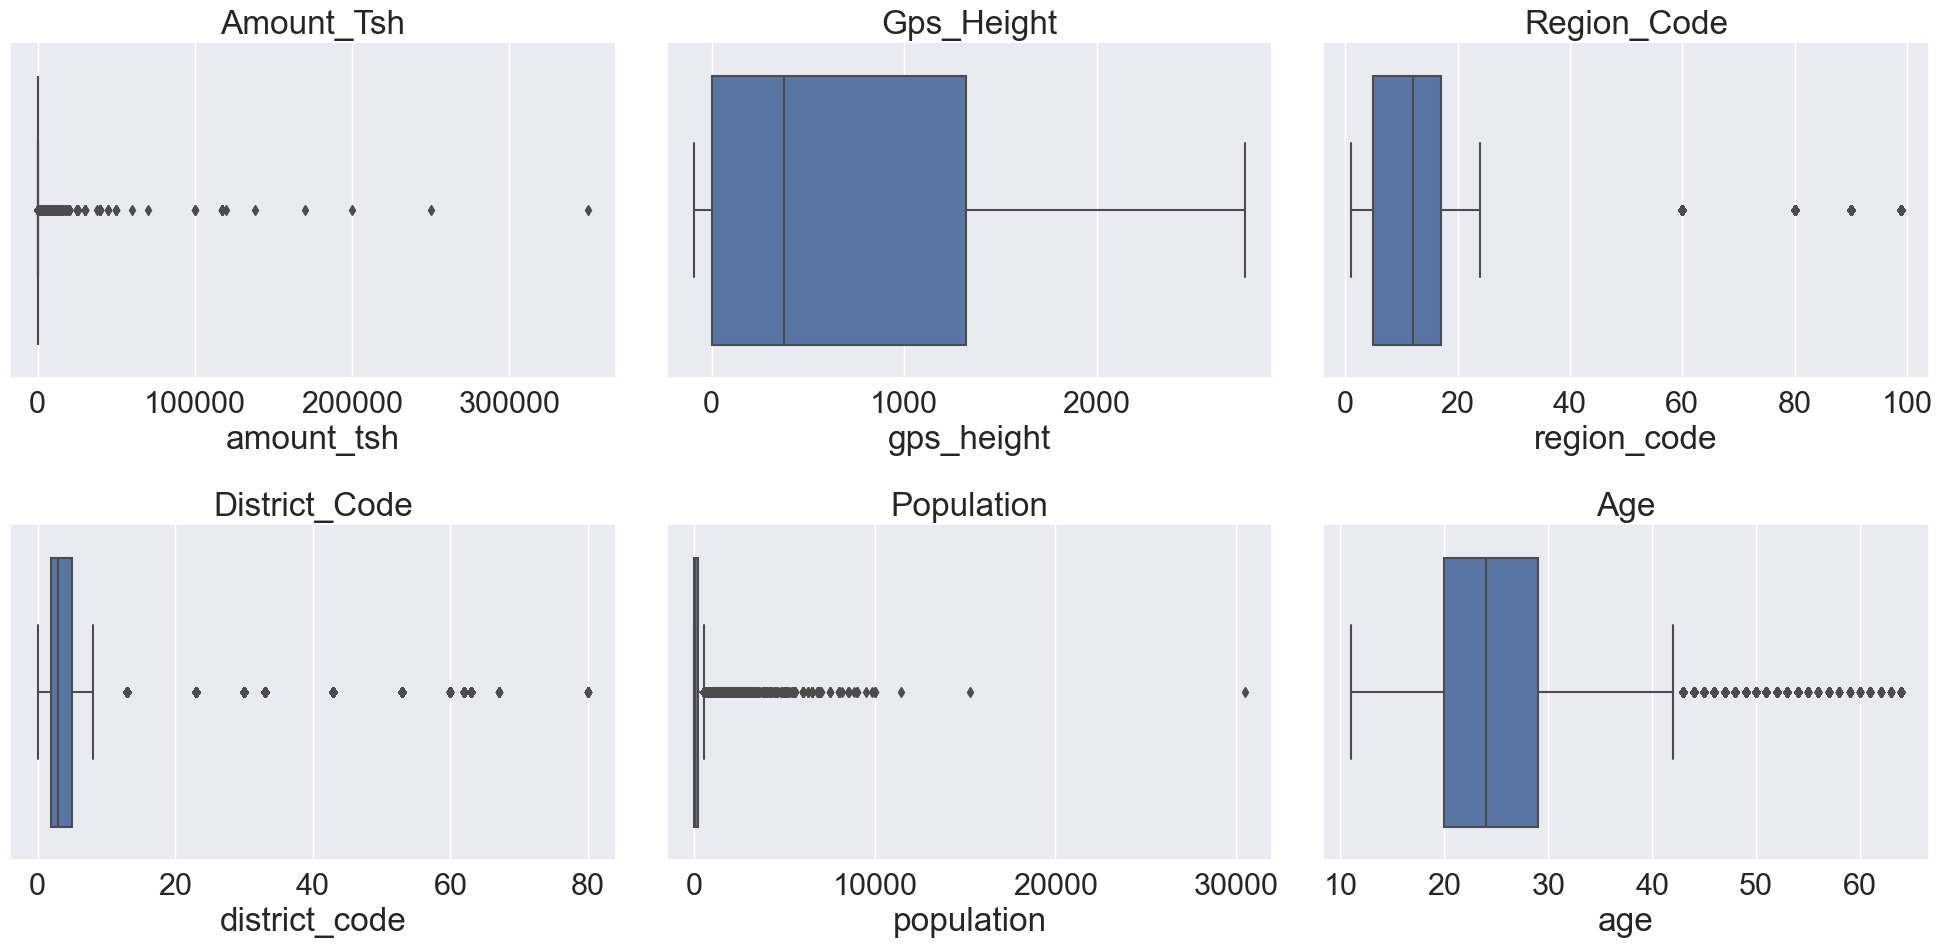

In [126]:
# function to visualize outliers 

def boxplot_outliers(df, cols):
    fig, axes = plt.subplots(2, 3, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)
    for i, col in enumerate(cols):

        # convert the x-axis variable to a numeric data type
        
        df[col] = df[col].astype(float)
        sns.boxplot(x=df[col], ax=axes[i])
        
        axes[i].set_title(col.title())
    plt.tight_layout()

# specify the columns to plot

cols = ['amount_tsh', 'gps_height',	'region_code','district_code','population', 'age']

# call the plot_boxplots function

boxplot_outliers(train_data, cols)

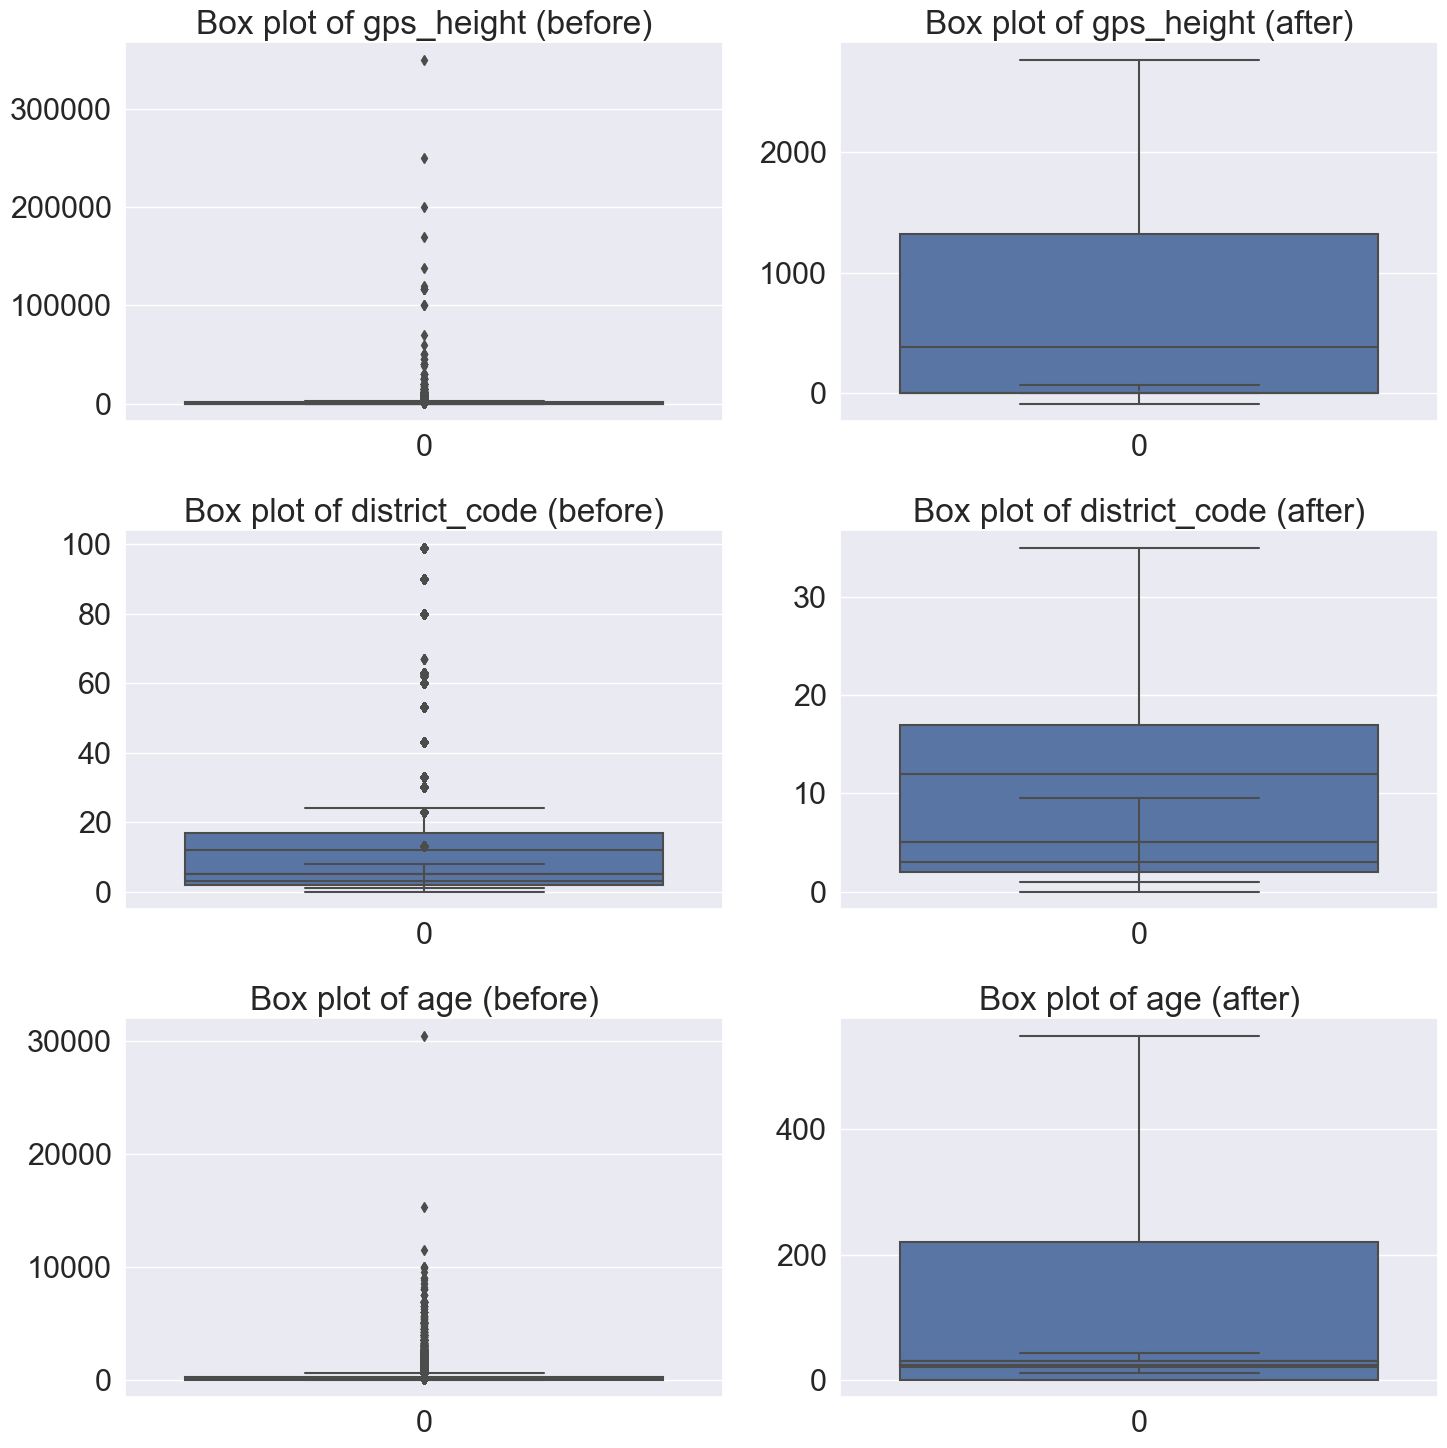

In [127]:

def detect_and_handle_outliers(df, method='remove'):
    # Select all numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    # Create subplots with a matrix layout
    num_plots = len(numerical_cols)
    num_rows = (num_plots + 1) // 2  # Ensure there are enough rows
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    
    for i, col in enumerate(numerical_cols):
        # 1st quartile
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile
        Q3 = np.percentile(df[col], 75)
        
        # IQR
        IQR = Q3 - Q1
        
        # Outlier step
        outlier_step = IQR * 1.5
        
        # Determine the indices of outliers
        outliers = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        # Plot box plot before handling outliers
        sns.boxplot(df[col], ax=axes[i // 2, 0])
        axes[i // 2, 0].set_title(f'Box plot of {col} (before)')

        if method == 'remove':
            # Remove outliers
            df = df.drop(outliers)
        elif method == 'cap':
            # Cap outliers
            lower_cap = Q1 - outlier_step
            upper_cap = Q3 + outlier_step
            df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
            df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])
            
        # Plot box plot after handling outliers
        sns.boxplot(df[col], ax=axes[i // 2, 1])
        axes[i // 2, 1].set_title(f'Box plot of {col} (after)')

    # Adjust layout
    plt.tight_layout()
    plt.show()

    return df

# Assuming you have your data in train_data
# train_data = pd.read_csv('path_to_your_dataset.csv')

# Detect and handle outliers
train_data_c = detect_and_handle_outliers(train_data, method='cap')


In [128]:
# save the cleaned train data
train_data.to_csv('train_data_clean.csv', index=False)

In [144]:
# check info about train_data_clean.csv
train_data_clean = pd.read_csv('Data/train_data_clean.csv')
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59026 entries, 0 to 59025
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59026 non-null  float64
 1   funder                 59026 non-null  object 
 2   gps_height             59026 non-null  int64  
 3   installer              59026 non-null  object 
 4   basin                  59026 non-null  object 
 5   region_code            59026 non-null  int64  
 6   district_code          59026 non-null  int64  
 7   population             59026 non-null  int64  
 8   public_meeting         59026 non-null  object 
 9   scheme_management      59026 non-null  object 
 10  permit                 59026 non-null  bool   
 11  extraction_type_class  59026 non-null  object 
 12  management             59026 non-null  object 
 13  payment                59026 non-null  object 
 14  water_quality          59026 non-null  object 
 15  qu

The next step i will do is to clean my test data.


In [130]:
#check info for the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

I will then check the contruction year which will help in coming up with age for the water wells.

In [131]:
test_data['construction_year'].value_counts()

construction_year
0       5260
2010     669
2009     663
2008     630
2000     487
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1981      53
1979      53
1977      45
1973      43
2013      33
1971      32
1963      22
1960      22
1969      18
1967      18
1968      16
1964       8
1961       7
1962       6
1965       2
1966       2
Name: count, dtype: int64

From this, we see year 0 with 5260 records. We will check the statistics with year 0 and without year 0.

In [132]:
# Create an object to hold column construction_year with year 0
test_data1 = test_data['construction_year'] 
test_data1.describe()

count    14850.000000
mean      1289.708350
std        955.241087
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [133]:
# check the column construction_year without year 0
test_data2 = test_data1[test_data1 != 0]
test_data2.describe()

count    9590.000000
mean     1997.097914
std        12.310565
min      1960.000000
25%      1988.000000
50%      2000.000000
75%      2008.000000
max      2013.000000
Name: construction_year, dtype: float64

The median year is 2000. we will replace the year 0 with 2000

In [134]:
#Change the data type of construction_year to int
test_data['construction_year'] = test_data['construction_year'].astype(int)

# Replace 0 with 2000
test_data['construction_year'] = test_data['construction_year'].replace(to_replace=0, value=2000)


In [135]:
# create column age using the contsruction_year and year 2024
test_data['age'] = 2024 - test_data['construction_year']
# drop the contsruction_year column
test_data.drop(columns=['construction_year'], inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [136]:
# Check for null values and duplicates
check_nulls_and_duplicates(test_data)

Columns with null values and their count/percentage:
funder: 870 (5.86%)
installer: 877 (5.91%)
subvillage: 99 (0.67%)
public_meeting: 821 (5.53%)
scheme_management: 969 (6.53%)
scheme_name: 7242 (48.77%)
permit: 737 (4.96%)
Number of duplicate rows: 0


0

In [137]:
# Replace 0 with True(mode) in permit column
test_data['permit'] = test_data['permit'].fillna(value=True)

# Replace 0 with Unknown
columns_to_fill = ['funder', 'installer', 'public_meeting', 'scheme_management']

for column in columns_to_fill:
    test_data[column] = test_data[column].fillna(value='Unknown')

# drop subvillage column, scheme_name column
test_data.drop(columns=['subvillage', 'scheme_name'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16868\570430657.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['permit'] = test_data['permit'].fillna(value=True)


In [138]:
# check for null values and duplicates
check_nulls_and_duplicates(test_data)

No null values
Number of duplicate rows: 0


0

In [139]:
# drop all columns dropped in the train data
columns_to_drop = ['id', 'date_recorded', 'longitude', 'latitude', 'wpt_name', 'num_private', 'lga', 'ward', 'recorded_by','extraction_type', 'extraction_type_group', 'management_group', 'payment_type','region','quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']
test_data.drop(columns=columns_to_drop, inplace=True)

In [140]:
# check info of the cleaned test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   funder                 14850 non-null  object 
 2   gps_height             14850 non-null  int64  
 3   installer              14850 non-null  object 
 4   basin                  14850 non-null  object 
 5   region_code            14850 non-null  int64  
 6   district_code          14850 non-null  int64  
 7   population             14850 non-null  int64  
 8   public_meeting         14850 non-null  object 
 9   scheme_management      14850 non-null  object 
 10  permit                 14850 non-null  bool   
 11  extraction_type_class  14850 non-null  object 
 12  management             14850 non-null  object 
 13  payment                14850 non-null  object 
 14  water_quality          14850 non-null  object 
 15  qu

In [141]:
# save the cleaned test data
test_data.to_csv('test_data_clean.csv', index=False)

In [142]:
# check info for the test_data_clean.csv
test_data_clean = pd.read_csv('Data/test_data_clean.csv')
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   funder                 14850 non-null  object 
 2   gps_height             14850 non-null  int64  
 3   installer              14850 non-null  object 
 4   basin                  14850 non-null  object 
 5   region_code            14850 non-null  int64  
 6   district_code          14850 non-null  int64  
 7   population             14850 non-null  int64  
 8   public_meeting         14850 non-null  object 
 9   scheme_management      14850 non-null  object 
 10  permit                 14850 non-null  bool   
 11  extraction_type_class  14850 non-null  object 
 12  management             14850 non-null  object 
 13  payment                14850 non-null  object 
 14  water_quality          14850 non-null  object 
 15  qu

In [145]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59026 entries, 0 to 59025
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59026 non-null  float64
 1   funder                 59026 non-null  object 
 2   gps_height             59026 non-null  int64  
 3   installer              59026 non-null  object 
 4   basin                  59026 non-null  object 
 5   region_code            59026 non-null  int64  
 6   district_code          59026 non-null  int64  
 7   population             59026 non-null  int64  
 8   public_meeting         59026 non-null  object 
 9   scheme_management      59026 non-null  object 
 10  permit                 59026 non-null  bool   
 11  extraction_type_class  59026 non-null  object 
 12  management             59026 non-null  object 
 13  payment                59026 non-null  object 
 14  water_quality          59026 non-null  object 
 15  qu